In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from babel.numbers import format_currency
import matplotlib.pyplot as plt

- Проанализируйте эффект от введения акционного предложения: оцените получаемый прирост, а также разбейте его на инкремент от механики и продвижения. Исследуйте влияние акции на модели 4580Х.
-  Рассчитайте доходность проекта для ООО "ТВОЕ" при условии, что долевое участие сторон в затратах на продвижение и выплату дотации 50%/50%. Оцените целесообразность проведения данной инициативы.
- Найдите зависимость между параметрами акционного предложения и получаемым приростом для каждой акционной модели.
- Проведите экспертный анализ одного из неохваченных на ваш взгляд вопросов в предложенном комплексе задач.

In [3]:
d1 = pd.read_excel('Для анализа.xlsx')

In [588]:
df.head()

,Акция,Дата,Модель,Количество,Оборот,Себестоимость
0,Без акции,2017-01-01,59234,46,50554,37915.50
1,Без акции,2017-01-01,45801,65,38935,27254.50
2,Без акции,2017-01-01,45802,37,77663,62130.40
3,Без акции,2017-01-01,45803,19,94981,75984.80
4,Без акции,2017-01-02,59234,181,198919,149189.25


In [589]:
df.rename(columns={"Акция": 'action', "Дата":'date','Модель':'model', 	"Количество":'cnt',	'Оборот':'price',	"Себестоимость":'selfprice'}, inplace = True)

In [590]:
df.head()

,action,date,model,cnt,price,selfprice
0,Без акции,2017-01-01,59234,46,50554,37915.50
1,Без акции,2017-01-01,45801,65,38935,27254.50
2,Без акции,2017-01-01,45802,37,77663,62130.40
3,Без акции,2017-01-01,45803,19,94981,75984.80
4,Без акции,2017-01-02,59234,181,198919,149189.25


In [591]:
df.tail()

,action,date,model,cnt,price,selfprice
3191,Вернем баллы на счет,2018-09-29,45802,132,277068,221654.4
3192,Вернем баллы на счет,2018-09-29,45803,61,304939,243951.2
3193,Вернем баллы на счет,2018-09-30,45801,289,173111,121177.7
3194,Вернем баллы на счет,2018-09-30,45802,159,333741,266992.8
3195,Вернем баллы на счет,2018-09-30,45803,73,364927,291941.6


In [592]:
df.model = df.model.apply(lambda x: str(x))


In [322]:
#df.price = df.price.apply(lambda x: format_currency(x, currency="₽", locale="ru_RU"))

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   action     3196 non-null   object        
 1   date       3196 non-null   datetime64[ns]
 2   model      3196 non-null   object        
 3   cnt        3196 non-null   int64         
 4   price      3196 non-null   int64         
 5   selfprice  3196 non-null   float64       
 6   quarter    3196 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 174.9+ KB


С первичной обработкой все, начинаем анализ

### Решил разбить по кварталам, чтобы легче было работать

In [593]:
df['quarter'] = df['date'].dt.quarter 

In [594]:
df.quarter = df.quarter.apply(lambda x: str(x))

In [595]:
df.head()

,action,date,model,cnt,price,selfprice,quarter
0,Без акции,2017-01-01,59234,46,50554,37915.50,1
1,Без акции,2017-01-01,45801,65,38935,27254.50,1
2,Без акции,2017-01-01,45802,37,77663,62130.40,1
3,Без акции,2017-01-01,45803,19,94981,75984.80,1
4,Без акции,2017-01-02,59234,181,198919,149189.25,1


Ищу прирост второго квартала в 2017, чтобы сравнить с целевым

Видим естественный прирост в виде 41%

## Начинаем анализ

In [340]:
revenue2018 = df.query('date > "2017-12-31"').groupby(['quarter']).agg({'price':'sum'})

In [610]:
revenue2017 = df.query('date < "2018"').groupby(['quarter']).agg({'price':'sum'})

<AxesSubplot:xlabel='quarter', ylabel='price'>

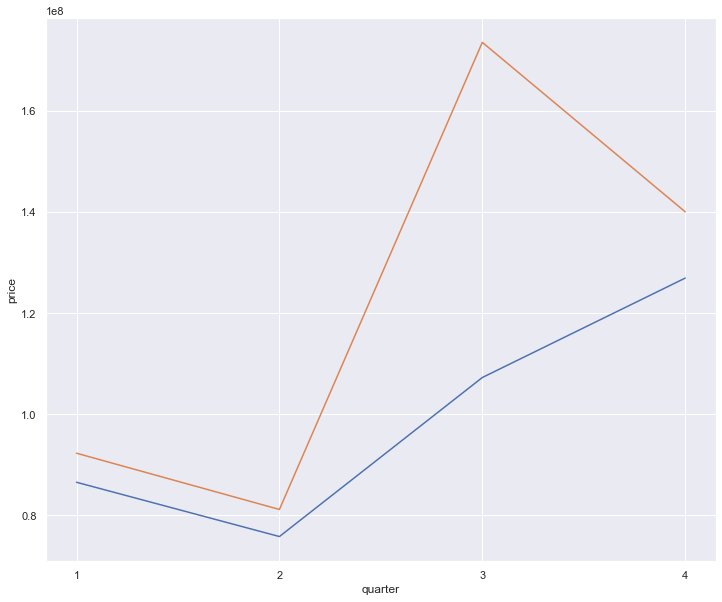

In [611]:
sns.lineplot(x = revenue2017.index, y = revenue2017.price)
sns.lineplot(x = revenue2018.index, y = revenue2018.price)

Видим скачкообразный прирост в 3ем квартале

Прирост относительно прошлого года:

In [536]:
df.query('date > "2018"').groupby('quarter').agg({'price':'sum'})/df.query('date < "2018"').groupby('quarter').agg({'price':'sum'})

,price
quarter,
1,1.066302
2,1.070561
3,1.617284
4,1.103111


Видим, что прирост в 3ем квартале 2018 года был 61% относительно прошлого года. 

А в целом колеблется в районе 6-10%

Посмотрю чуть детальнее на модели

Продажи искомых моделей во 2ом квартале 2017

In [407]:
df.query(f'date > "2018" and quarter == 2')\
    .groupby('model', as_index=False).agg({'cnt':'sum'})[:-1]

,model,cnt
0,45801,20238
1,45802,11559
2,45803,5786


Продажи искомых моделей во 2ом квартале 2018

In [408]:
df.query(f'date < "2018" and quarter == 2')\
    .groupby('model', as_index=False).agg({'cnt':'sum'})[:-1]

,model,cnt
0,45801,18908
1,45802,10806
2,45803,5399


<AxesSubplot:xlabel='model', ylabel='cnt'>

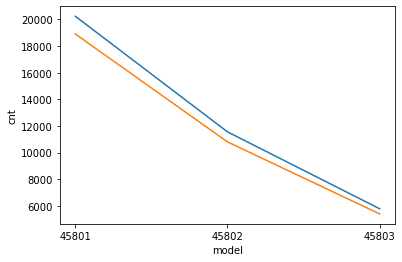

In [415]:
sns.lineplot(x = df.query(f'date > "2018" and quarter == 2')\
    .groupby('model', as_index=False).agg({'cnt':'sum'})[:-1].model, y = df.query(f'date > "2018" and quarter == 2')\
    .groupby('model', as_index=False).agg({'cnt':'sum'})[:-1].cnt)
sns.lineplot(x = df.query(f'date < "2018" and quarter == 2')\
    .groupby('model', as_index=False).agg({'cnt':'sum'})[:-1].model, y = df.query(f'date < "2018" and quarter == 2')\
    .groupby('model', as_index=False).agg({'cnt':'sum'})[:-1].cnt)

#### Видим, что во втором квартале 2017 и 2018 года разница в объемах продаж целевой группы не существена

Продажи искомых моделей во 3ем квартале 2018

In [409]:
df.query(f'date > "2018" and quarter == 3')\
    .groupby('model', as_index=False).agg({'cnt':'sum'})[:-1]

,model,cnt
0,45801,50740
1,45802,27896
2,45803,12826


Продажи искомых моделей во 3ем квартале 2017

In [410]:
df.query(f'date < "2018" and quarter == 3')\
    .groupby('model', as_index=False).agg({'cnt':'sum'})[:-1]

,model,cnt
0,45801,26728
1,45802,15271
2,45803,7645


<AxesSubplot:xlabel='model', ylabel='cnt'>

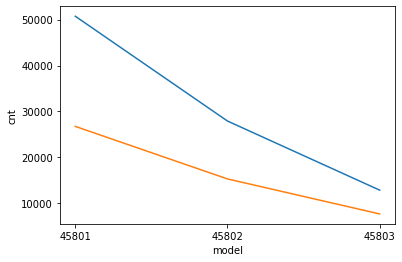

In [420]:
sns.lineplot(x = df.query(f'date > "2018" and quarter == 3')\
    .groupby('model', as_index=False).agg({'cnt':'sum'})[:-1].model, y = df.query(f'date > "2018" and quarter == 3')\
    .groupby('model', as_index=False).agg({'cnt':'sum'})[:-1].cnt)
sns.lineplot(x = df.query(f'date > "2018" and quarter == 3')\
    .groupby('model', as_index=False).agg({'cnt':'sum'})[:-1].model, y = df.query(f'date < "2018" and quarter == 3')\
    .groupby('model', as_index=False).agg({'cnt':'sum'})[:-1].cnt)

В 3ем же квартале, разница значительна

На всякий случай еще посмотрю продажи прошлого квартала

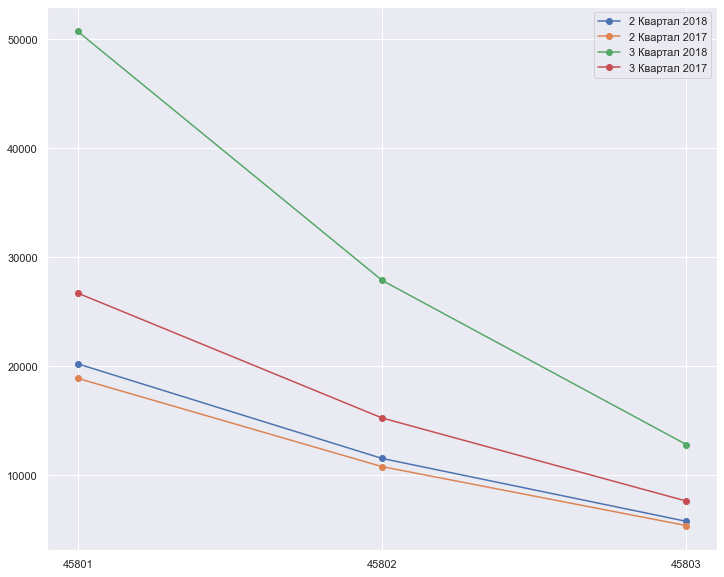

In [519]:
f, ax = plt.subplots(1, 1)
plt.xticks = 'Модель'
y_col = 'Количество продаж'
ax.xlabel = 'Модель'
ax.plot_date( df.query(f'date > "2018" and quarter == 2')\
    .groupby('model', as_index=False).agg({'cnt':'sum'})[:-1].model, df.query(f'date > "2018" and quarter == 2')\
    .groupby('model', as_index=False).agg({'cnt':'sum'})[:-1].cnt, label = '2 Квартал 2018',linestyle="-")
ax.plot_date( df.query(f'date < "2018" and quarter == 2')\
    .groupby('model', as_index=False).agg({'cnt':'sum'})[:-1].model, df.query(f'date < "2018" and quarter == 2')\
    .groupby('model', as_index=False).agg({'cnt':'sum'})[:-1].cnt, label = '2 Квартал 2017',linestyle="-")
ax.plot_date( df.query(f'date > "2018" and quarter == 3')\
    .groupby('model', as_index=False).agg({'cnt':'sum'})[:-1].model, df.query(f'date > "2018" and quarter == 3')\
    .groupby('model', as_index=False).agg({'cnt':'sum'})[:-1].cnt, label = '3 Квартал 2018',linestyle="-")
ax.plot_date( df.query(f'date < "2018" and quarter == 3')\
    .groupby('model', as_index=False).agg({'cnt':'sum'})[:-1].model, df.query(f'date < "2018" and quarter == 3')\
    .groupby('model', as_index=False).agg({'cnt':'sum'})[:-1].cnt, label = '3 Квартал 2017', linestyle="-")
plt.legend()

sns.set(rc={'figure.figsize':(12,10)})


#### Думаю, что стоит переходить к расчетам доходности

Расчитаю сколько акционных моделей мы продали за искомый период

In [452]:
expenses = df.query(f'date > "2018" and quarter == 3')\
    .groupby(['action','model'], as_index=False).agg({'cnt':'sum'}).query('action == "Вернем баллы на счет"')[['model','cnt']]

In [459]:
expenses

,model,cnt
4,45801,30674
5,45802,16867
6,45803,7762


In [470]:
expenses_sum = expenses.iloc[0][1] * 75 + expenses.iloc[1][1] * 150 + expenses.iloc[2][1] * 250

In [472]:
expenses_sum

6771100

Суммирую с затратами на рекламу

In [474]:
expenses_sum + 2500000

9271100

Расходы компании на проведение промоакции 9 271 100 ₽

Посчитаю доход с акционных товаров и неакционных

In [582]:
df.query(f'date > "2018" and quarter == 3')\
    .groupby(['action'], as_index=False).agg({'price':'sum', 'selfprice':'sum'})

,action,price,selfprice
0,Без акции,80888375,62488544.9
1,Вернем баллы на счет,92579797,72226465.0


Решил посмотреть так же сколько была выручка в 2017 году в 3ем квартале, чтобы понимать насколько повлияла наша акция  

В 2018

In [585]:
df.query(f'date > "2018" and quarter == 3')\
    .groupby(['action'], as_index=False).agg({'price':'sum', 'selfprice':'sum'}).iloc[1].price

92579797

Сколько в 3ем квартале 2017

In [497]:
df.query(f'date < "2018" and quarter == 3')\
    .groupby(['action'], as_index=False).agg({'price':'sum', 'selfprice':'sum'}).price

0    107258968
Name: price, dtype: int64

In [499]:
df.query(f'date < "2018" and quarter == 3')\
    .groupby(['action'], as_index=False).agg({'price':'sum', 'selfprice':'sum'}).price / df.query(f'date > "2018" and quarter == 3')\
    .groupby(['action'], as_index=False).agg({'price':'sum', 'selfprice':'sum'}).iloc[1].price

0    1.158557
Name: price, dtype: float64

Разница в 15% однако числа примерно одного порядка, так что можно сказать, что большая часть дохода с акции - это "заслуга" акции

In [521]:
df.query('date > "2018"').groupby('quarter').agg({'price':'sum'}) / df.query('date < "2018"').groupby('quarter').agg({'price':'sum'})

,price
quarter,
1,1.066302
2,1.070561
3,1.617284
4,1.103111


Разница между годами, не считая наш целевой квартал, колеблется между 6-10%, так что считаю справедливым из общей выручки от акции отнять 8%

In [527]:
(df.query(f'date > "2018" and quarter == 3')\
    .groupby(['action'], as_index=False).agg({'price':'sum', 'selfprice':'sum'}).iloc[1].price - df.query(f'date > "2018" and quarter == 3')\
    .groupby(['action'], as_index=False).agg({'price':'sum', 'selfprice':'sum'}).iloc[1].selfprice) * 0.92

18725065.44

Итого получаем почти 19 млн ₽ выручки от акции

Напомню, что затраты были такими: 9 271 100 ₽

In [528]:
18725065 - 9271100

9453965

По итогу получаем, что на промоакции мы заработали 9453965 ₽ 

## Итоги

#### Подведем итоги и ответим на поставленные вопросы

* Проанализируйте эффект от введения акционного предложения: оцените получаемый прирост, а также разбейте его на инкремент от механики и продвижения. Исследуйте влияние акции на модели 4580Х.

Мы получили прирост в 114% от второго квартала 2018 года, что больше прошлогоднего прироста на тот же период на 61%

Выяснили, что сезонный прирост прошлого года был 41%

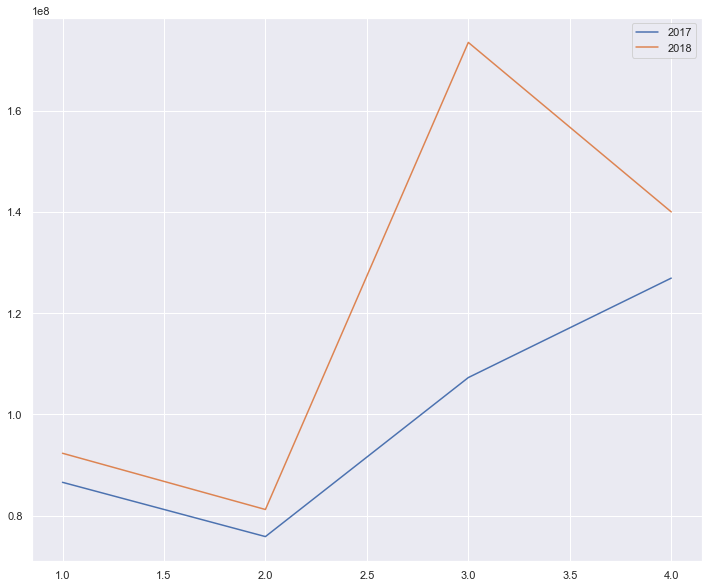

In [557]:
f, ax = plt.subplots(1, 1)
ax.plot(df.query('date < "2018"').groupby('quarter').agg({'price':'sum'}), label = '2017')
ax.plot(df.query('date > "2018"').groupby('quarter').agg({'price':'sum'}), label = '2018')
plt.legend()

Также мы выяснили, что в среднем прирост оборота от прошлого года вырос примерно на 6-10%

## О моделях 4580Х

Удалось выяснить, что акция крайне положительно повлияла на продажи моделей 4580X

Так модель:

- 45801 принесла на 89% больше выручки, чем в аналогичный период прошлого года.
- 45802 принесла на 82% больше выручки, чем в аналогичный период прошлого года.
- 45803 принесла на 67% больше выручки, чем в аналогичный период прошлого года.
- А вот модель 59234 упала в выручке относительно прошлогоднего периода.

In [643]:
df.query(f'date > "2018" and quarter == "3"').groupby('model').agg({'price':'sum'})/df.query(f'date < "2018" and quarter == "3"').groupby('model').agg({'price':'sum'})

,price
model,
45801,1.898384
45802,1.826730
45803,1.677698
59234,0.972653


In [662]:
persent_grow = df.query(f'date > "2018" and quarter == "3"').groupby('model').agg({'price':'sum'})/df.query(f'date < "2018" and quarter == "3"').groupby('model').agg({'price':'sum'})

<AxesSubplot:ylabel='price'>

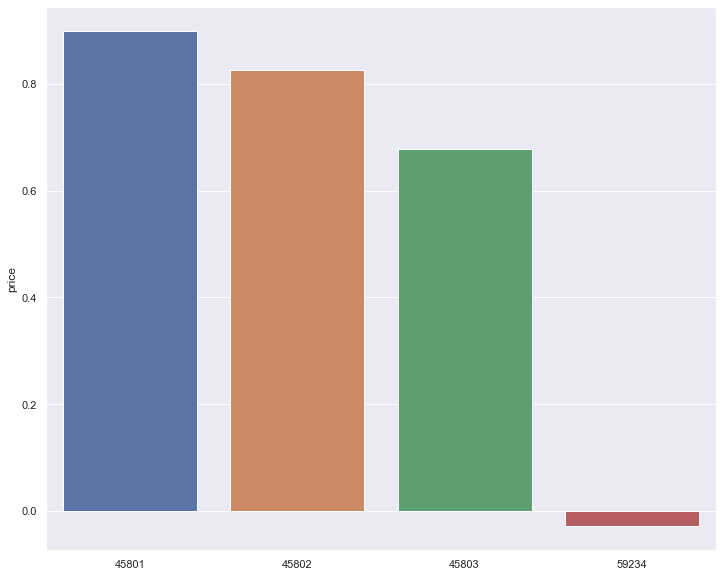

In [666]:
sns.barplot(x = ['45801','45802','45803','59234'], y = persent_grow.price-1)



В то время, как во 2ом квартале 2018 прирост был в среднем на 7%

In [667]:
df.query(f'date > "2018" and quarter == "2"').groupby('model').agg({'price':'sum'})\
    /df.query(f'date < "2018" and quarter == "2"').groupby('model').agg({'price':'sum'})

,price
model,
45801,1.070341
45802,1.069684
45803,1.071680
59234,1.070038


Так же можно заметить зависимость условий акции на ее эффективность. Имеется ввиду, что видно, что модель 45801 продавалась больше, чем 45802, а она в свою очередь лучше, чем 45803, но это связанно с самим товаром, тк, судя по данным ниже, модель 45801 самая доступная, 45802 более догорая и всегда продавались лучше.

In [685]:
df.groupby(['model',]).agg({'price':'sum', 'cnt':'sum'})

,price,cnt
model,,
45801,136826575,228425
45802,271663075,129425
45803,318046378,63622
59234,157294375,143125


### Доходность акции составила 9 453 965  ₽ 

### Из неохваченных тем, так и напрашивался вопрос сезонности

Из данных видно, что у нас есть просадка по выручке во втором квартале, связанная с сезонностью, которая четко прослеживатеся на графике

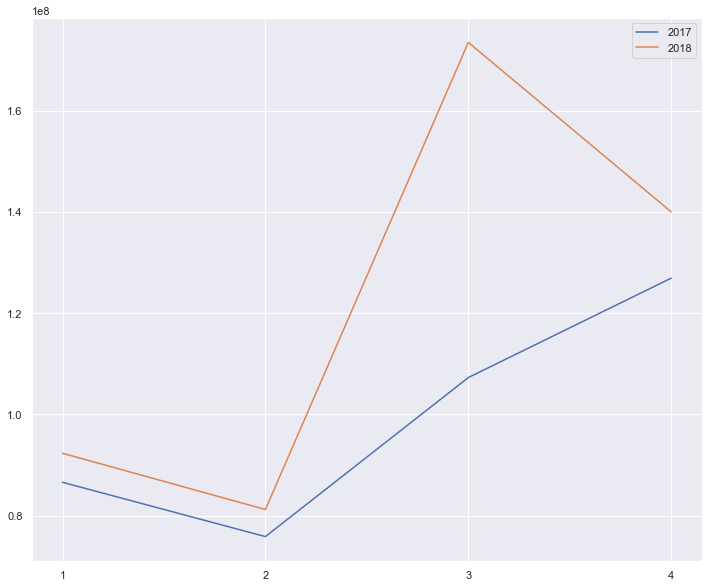

In [678]:
f, ax = plt.subplots(1, 1)
ax.plot(df.query('date < "2018"').groupby('quarter').agg({'price':'sum'}), label = '2017')
ax.plot(df.query('date > "2018"').groupby('quarter').agg({'price':'sum'}), label = '2018')
plt.legend()

In [683]:
df.query('date < "2018" and quarter == "2"').price.sum()/ df.query('date < "2018" and quarter == "1"').price.sum()

0.8761285696820585

In [684]:
df.query('date > "2018" and quarter == "2"').price.sum()/ df.query('date > "2018" and quarter == "1"').price.sum()

0.8796281060767418

В обоих годах на 13%